#  신경말 모델에서 옵티마이저 사용법
### - 이진분류: 유방암 예측 사례

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()
cancer_std = StandardScaler().fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)

### 1. Adam optimizer

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
model = Sequential([
    Dense(100, input_dim=30, activation='relu',),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

#### Adam 하이퍼 파라메터
- learning_rate: 0보다 크거나 같은 float 값. 학습률.
- beta_1: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
- beta_2: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
- epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
- decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.
- amsgrad: 불리언. Adam의 변형인 AMSGrad의 적용 여부를 설정합니다


In [5]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,
            epsilon=None, decay=0.0, amsgrad=False)

In [6]:
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=100, verbose=0)

In [8]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0765 - accuracy: 0.9825


[0.07648683339357376, 0.9824561476707458]

In [9]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

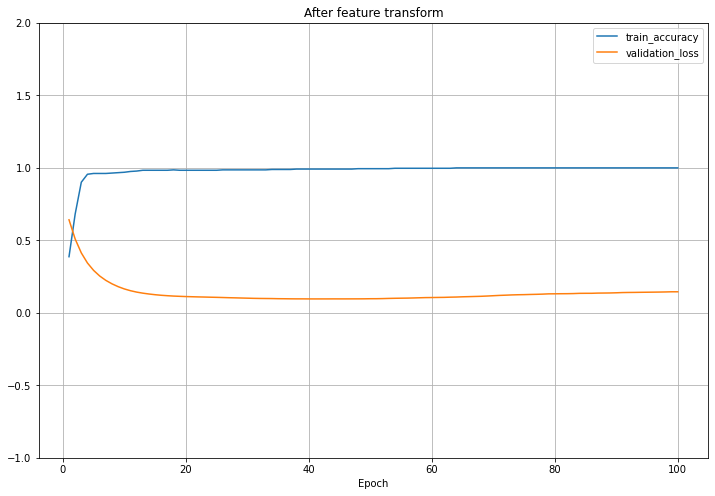

In [10]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train_accuracy')
plt.plot(xs, y_vloss, label='validation_loss')
plt.legend(), plt.grid()
plt.ylim([-1,2])
plt.xlabel('Epoch')
plt.title('After feature transform')
plt.show()

#### 2.RMSprop

In [11]:
model2 = Sequential([
    Dense(100, input_dim=30, activation='relu',),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

#### RMSprop 하이퍼 파라메터
- lr: 0보다 크거나 같은 float 값. 학습률.
- rho: 0보다 크거나 같은 float 값.
- epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
- decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.

In [12]:
from tensorflow.keras.optimizers import RMSprop
rmsp = RMSprop(learning_rate=0.001, rho=0.9, epsilon=None, decay=0.0)

In [13]:
model2.compile(rmsp, 'binary_crossentropy', ['accuracy'])

In [14]:
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                   epochs=100, batch_size=100, verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 63ms/step - loss: 0.5634 - accuracy: 0.7143 - val_loss: 0.4167 - val_accuracy: 0.8571
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.3611 - accuracy: 0.8956 - val_loss: 0.3220 - val_accuracy: 0.8901
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 0.2739 - accuracy: 0.9286 - val_loss: 0.2668 - val_accuracy: 0.9011
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2202 - accuracy: 0.9505 - val_loss: 0.2269 - val_accuracy: 0.9231
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1810 - accuracy: 0.9643 - val_loss: 0.1968 - val_accuracy: 0.9231
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 0.1527 - accuracy: 0.9698 - val_loss: 0.1757 - val_accuracy: 0.9231
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1304 - accuracy: 0.9780 - val_loss: 0.1587 - val_accuracy: 0.9451
Epoch 8/100
4/4 [===

In [15]:
model2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.1088 - accuracy: 0.9825


[0.10875752568244934, 0.9824561476707458]

In [16]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs2 = np.arange(1, len(y_acc2)+1)

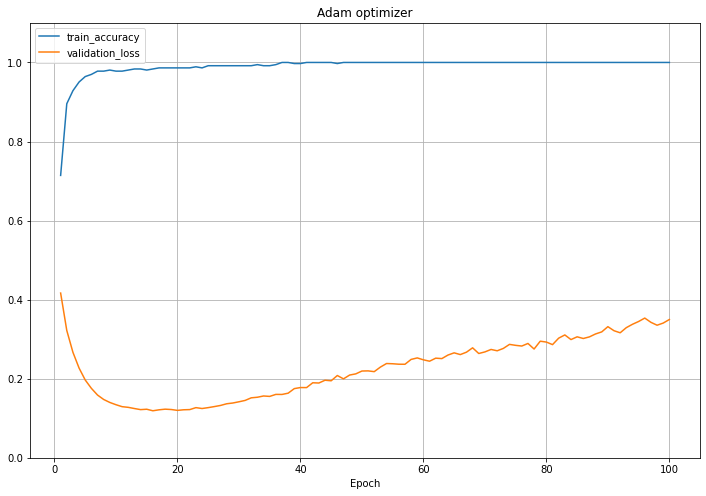

In [17]:
plt.figure(figsize=(12,8))
plt.plot(xs2, y_acc2, label='train_accuracy')
plt.plot(xs2, y_vloss2, label='validation_loss')
plt.legend(), plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('Adam optimizer')
plt.show()

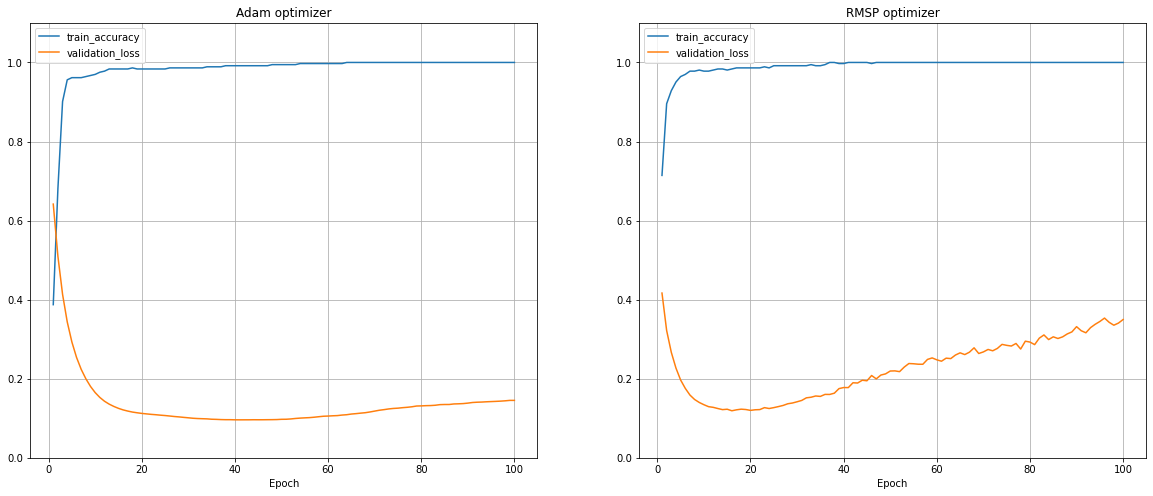

In [20]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(xs, y_acc, label='train_accuracy')
plt.plot(xs, y_vloss, label='validation_loss')
plt.legend(), plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('Adam optimizer')

plt.subplot(122)
plt.plot(xs2, y_acc2, label='train_accuracy')
plt.plot(xs2, y_vloss2, label='validation_loss')
plt.legend(), plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('RMSP optimizer')
plt.show()